In [ ]:
#Variables
import numpy as np
m_s = 600 #kg
m_uf = 40 #kg   tire+rim+brakes
m_ur = 40 #kg   tire+rim+brakes
k_sf = 30000 # N/m   Front Wheel
c_sf = 3000 # Ns/m   Front Wheel
k_sr = 30000 # N/m   Rear Wheel
c_sr = 3000 # Ns/m   Rear Wheel
k_tf = 200000 # N/m   tire stiffness
k_tr = 200000 # N/m
z_s = 0.0  #Car center of mass position
z_uf = 0.0  # Front tire position
z_ur = 0.0  #Rear tire position
z1_s = 0.0 # Car center of mass velocity
z1_uf = 0.0 #Front tire velocity
z1_ur = 0.0 #Rear tire velocity
A = 0.05 # m
w = 10 # rad/s
t = 0.0 # seconds
a = 1.2 # meters  distance from CG to front axle
b = 1.6 # meters  distance from CG to rear axle
h = 0.7 # meters  height of CG
theta = 0.0 #radians   Car Pitch
theta1 = 0.0
g = 9.81 # m/s^2
z_r = 0.0

dt = 0.0005

In [ ]:
# State Vector Array     Sprung mass position, Sprung Mass Velocity, FW Position, FW Velocity, RW Position, RW Velocity, Pitch Angle(rad), Pitch Velocity
X = [z_s, z1_s, z_uf, z1_uf, z_ur, z1_ur, theta, theta1]

In [ ]:
def road_input(A, w, t):
  z_r = A * np.sin(w * t)
  z1_r = A * w * np.cos(w * t)
  return z_r, z1_r

In [ ]:
#Forces and Moments
#F_sf = k_sf*z_s + c_sf*(z1_s + a*theta1 - z1_uf)
#F_sr = k_sr*z_s + c_sr*(z1_s - b*theta1 - z1_ur)
#Ma = F_sf * a
#Mb = F_sr * b

#Inertia
#Iyy = m_s*((a+b)**2)*0.2  #0.2 is scaling factor

In [ ]:
#Car acceleration  a = F/m
def HalfCar_Accel(X, A, w, t):
  #Road Input
  z_r, _ = road_input(A, w, t)
  #Deflections
  dsf = (z_s + a*theta) - z_uf
  dsr = (z_s - b*theta) - z_ur
  #Deflection Velocity
  d1sf = (z1_s + a*theta1) - z1_uf
  d1sr = (z1_s - b*theta1) - z1_ur
  #Forces and Moments
  F_sf = k_sf*dsf + c_sf*d1sf
  F_sr = k_sr*dsr + c_sr*d1sr
  Ma = F_sf * a
  Mb = F_sr * b

  #Inertia
  Iyy = m_s*((a+b)**2)*0.2  #0.2 is scaling factor

  #Accelerations
  a_s = (-k_sf*(z_s - z_uf))-(k_sr*(z_s - z_ur))-(c_sf*(z1_s - z1_uf))-(c_sr*(z1_s - z1_ur)) / m_s
  a_uf = ((k_sf*(z_s - z_uf)) + (c_sf*(z1_s - z1_uf)) - (k_tf*(z_uf - z_r))) / m_uf
  a_ur = ((k_sr*(z_s - z_ur)) + (c_sr*(z1_s - z1_ur)) - (k_tr*(z_ur - z_r))) / m_ur
  a_theta = (-a*(F_sf) + b*(F_sr)) / (Iyy)  #mass cancels out
  return a_s, a_uf, a_ur, a_theta

In [ ]:
print(z_r)

0.0


In [ ]:
#RK4 Step
def RK4_step(X, t):

  def Q(X, t):
    [z_s, z1_s, z_uf, z1_uf, z_ur, z1_ur, theta, theta1] = X
    a_s, a_uf, a_ur, a_theta = HalfCar_Accel(X, A, w, t)
    return np.array([z1_s, a_s, z1_uf, a_uf, z1_ur, a_ur, theta1, a_theta])

  [z_s, z1_s, z_uf, z1_uf, z_ur, z1_ur, theta, theta1] = X

  k1 = Q(X, t)
  k2 = Q((X + 0.5*k1*dt), t + 0.5*dt)
  k3 = Q((X + 0.5*k2*dt), t + 0.5*dt)
  k4 = Q((X + k3*dt), t + dt)

  X_next = X + ((k1 + 2*k2 + 2*k3 + k4)/6) * dt
  return X_next

In [ ]:
print(type(X))

<class 'list'>


In [ ]:
#RK4 Solver
t_end = 3 #sec

Time = []
Zs = []
Zuf = []
Zur = []
Z1s = []
Z1uf = []
Z1ur = []
Pitch = []
Pitch_Vel = []
Zr = []
Dsf = []

while t < t_end:
  z_s, z1_s, z_uf, z1_uf, z_ur, z1_ur, theta, theta1 = RK4_step(X, t)
  z_r, _ = road_input(A, w, t)
  t += dt

  Time.append(t)
  Zs.append(z_s)
  Zuf.append(z_uf)
  Zur.append(z_ur)
  Z1s.append(z1_s)
  Z1uf.append(z1_uf)
  Z1ur.append(z1_ur)
  Pitch.append(theta)
  Pitch_Vel.append(theta1)
  Zr.append(z_r)

/tmp/ipython-input-1370629868.py:16: RuntimeWarning: overflow encountered in add
  X_next = X + ((k1 + 2*k2 + 2*k3 + k4)/6) * dt
/tmp/ipython-input-716912176.py:24: RuntimeWarning: invalid value encountered in scalar add
  a_theta = (-a*(F_sf) + b*(F_sr)) / (Iyy)  #mass cancels out


In [ ]:
#Data Lists
print(f'Cab Position: {Zs}')
print(f'Front Wheel Position: {Zuf}')
print(f'Front Wheel Velocity: {Z1uf}')
print(f'Rear Wheel Position: {Zur}')
print(f'Front Wheel Velocity: {Zuf}')
print(f'Road Input: {Zr}')

Cab Position: [np.float64(0.0), np.float64(1.1777319254580232e-07), np.float64(1.7138939039943724e-07), np.float64(3.2419386008562743e-07), np.float64(3.2347899440310275e-07), np.float64(5.603313942435179e-07), np.float64(4.2949604680321284e-07), np.float64(8.676651268863901e-07), np.float64(4.251995601417334e-07), np.float64(1.3455678441713352e-06), np.float64(1.5675218913401691e-07), np.float64(2.2320724717580563e-06), np.float64(-7.442750651083384e-07), np.float64(4.097315916548985e-06), np.float64(-3.1602782689067932e-06), np.float64(8.306855137756512e-06), np.float64(-9.204652644159533e-06), np.float64(1.8131352420287444e-05), np.float64(-2.3939151411451542e-05), np.float64(4.140437527535545e-05), np.float64(-5.948712066781649e-05), np.float64(9.688807550743433e-05), np.float64(-0.00014488508120455776), np.float64(0.00022951958529684866), np.float64(-0.0003496781873572032), np.float64(0.0005469275602245204), np.float64(-0.0008404335553826149), np.float64(0.0013068927114075295), np

In [ ]:
#Plotting Function
def simple_plot(x_value, y_value, xlabel, ylabel, title):
  import matplotlib.pyplot as plt
  plt.figure()
  plt.plot(x_value, y_value)
  plt.xlabel(f'{xlabel}')
  plt.ylabel(f'{ylabel}')
  plt.title(f'{title}' )
  plt.grid
  plt.show()


def plot_overlay(x_value, y1_value, y2_value, xlabel, ylabel, title, line1, line2):
  import matplotlib.pyplot as plt
  plt.figure()
  plt.plot(x_value, y1_value, label=line1)
  plt.plot(x_value, y2_value, label=line2, linestyle='--')
  plt.xlabel(f'{xlabel}')
  plt.ylabel(f'{ylabel}')
  plt.title(f'{title}')
  plt.grid()
  plt.legend()
  plt.show()

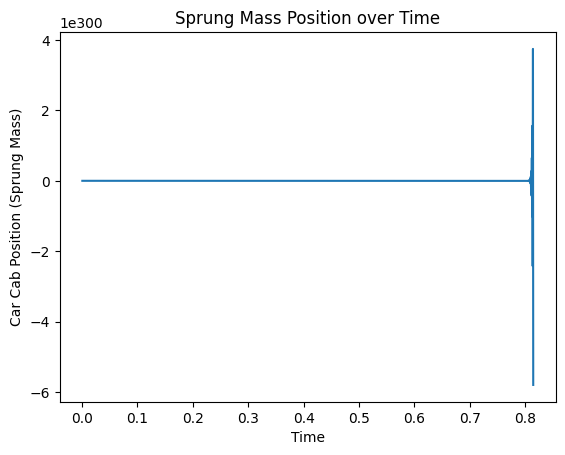

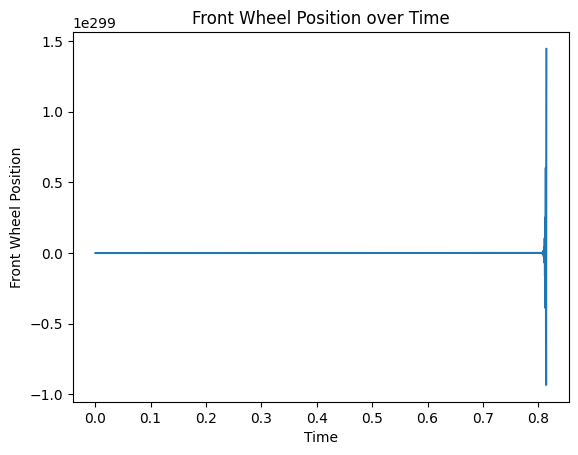

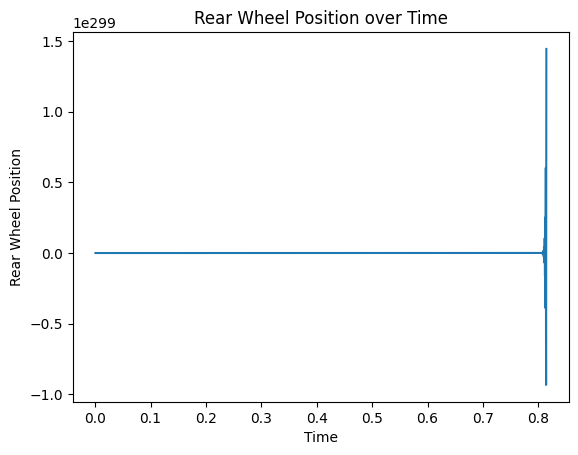

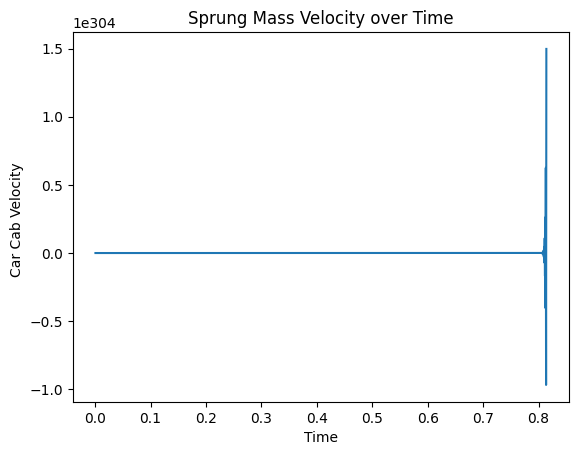

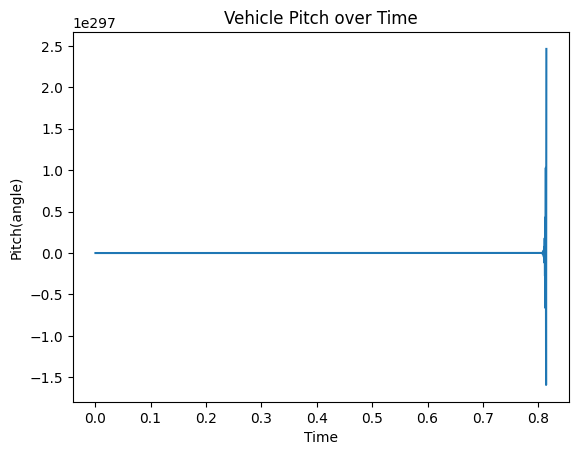

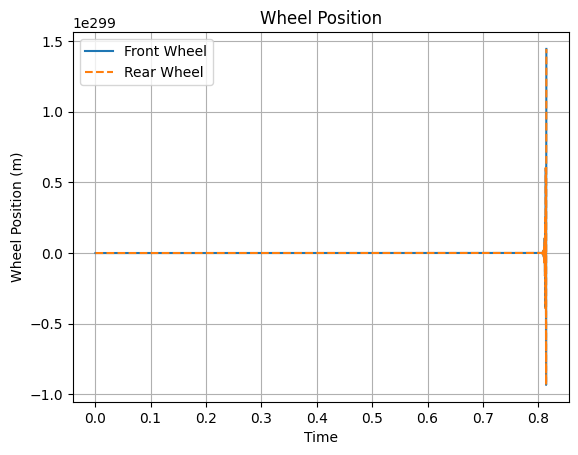

In [ ]:
simple_plot(Time, Zs, 'Time', 'Car Cab Position (Sprung Mass)', 'Sprung Mass Position over Time')
simple_plot(Time, Zuf, 'Time', 'Front Wheel Position', 'Front Wheel Position over Time')
simple_plot(Time, Zur, 'Time', 'Rear Wheel Position', 'Rear Wheel Position over Time')
simple_plot(Time, Z1s, 'Time', 'Car Cab Velocity ', 'Sprung Mass Velocity over Time')
simple_plot(Time, Pitch, 'Time', 'Pitch(angle)', 'Vehicle Pitch over Time')
plot_overlay(Time, Zuf, Zur, 'Time', 'Wheel Position (m)', 'Wheel Position', 'Front Wheel', 'Rear Wheel')